# Home assignment 4

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("telecom_data.csv")

In [3]:
del df['Unnamed: 0']

# Replace “No internet service” to “No” for the following attributes:
`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`. 


In [4]:
print(df['OnlineSecurity'].unique())
print(df['OnlineBackup'].unique())
print(df['DeviceProtection'].unique())
print(df['TechSupport'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingMovies'].unique())
print(df['MultipleLines'].unique())

['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'No phone service' 'Yes']


In [5]:
#for ind,row in df.iterrows():
 #   if df['MultipleLines'].loc[ind] == 'No phone service':
  #      df['MultipleLines'].loc[ind] = "No"    

# Generate `tenure_group` attribute: discretize `tenure` into 6 groups: “0-12”, “12-24”, “24-36”, “36-48”, “48-60”, “60+” (all are left closed intervals: [0, 12), [12, 24), [24, 36)...). What are the sizes of these groups?
Tenure refers to the number of months that a customer has subscribed for.
Do not drop the `tenure` column.


In [6]:
df['tenure_group'] = ""

for ind,row in df.iterrows():
    if df['tenure'].loc[ind] < 12:
        df['tenure_group'].loc[ind] = "0"
    elif df['tenure'].loc[ind] < 24:
        df['tenure_group'].loc[ind] = "1"
    elif df['tenure'].loc[ind] < 36:
        df['tenure_group'].loc[ind] = "2"
    elif df['tenure'].loc[ind] < 48:
        df['tenure_group'].loc[ind] = "3"
    elif df['tenure'].loc[ind] < 60:
        df['tenure_group'].loc[ind] = "4"
    else:
        df['tenure_group'].loc[ind] = "5"


C:\Users\Anton\Anaconda3\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
df.groupby('tenure_group')[['index']].count()

,index
tenure_group,
0,1573
1,844
2,719
3,670
4,775
5,1462


# Preprocess categorical columns with only 2 unique values (“binary” columns): replace one unique value with 0 and another with 1 (label encoding). How many such columns do you have?
E.g. for the `gender` attribute you may replace Female with 1 and Male with 0 or vice versa. 


In [8]:
#categorical_list = ('gender','','')

df.iloc[1]

index                            2
customerID              3668-QPYBK
gender                        Male
SeniorCitizen                   No
Partner                         No
Dependents                      No
tenure                           2
PhoneService                   Yes
MultipleLines                   No
InternetService                DSL
OnlineSecurity                 Yes
OnlineBackup                   Yes
DeviceProtection                No
TechSupport                     No
StreamingTV                     No
StreamingMovies                 No
Contract            Month-to-month
PaperlessBilling               Yes
PaymentMethod         Mailed check
MonthlyCharges               53.85
TotalCharges                108.15
Churn                          Yes
tenure_group                     0
Name: 1, dtype: object

In [9]:
print(df['InternetService'].unique())
print(df['Contract'].unique())
print(df['PaymentMethod'].unique())
print(df['MultipleLines'].unique())

['DSL' 'Fiber optic' 'No']
['One year' 'Month-to-month' 'Two year']
['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']
['No' 'No phone service' 'Yes']


In [10]:
df['gender'] = df['gender'].replace(to_replace=['Male', 'Female'], value=[1, 0])
df['OnlineSecurity'] = df['OnlineSecurity'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['OnlineBackup'] = df['OnlineBackup'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['DeviceProtection'] = df['DeviceProtection'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['TechSupport'] = df['TechSupport'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['StreamingTV'] = df['StreamingTV'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['StreamingMovies'] = df['StreamingMovies'].replace(to_replace=['Yes', 'No'], value=[1, 0])
#
df['SeniorCitizen'] = df['SeniorCitizen'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['Partner'] = df['Partner'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['Dependents'] = df['Dependents'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['PhoneService'] = df['PhoneService'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['PaperlessBilling'] = df['PaperlessBilling'].replace(to_replace=['Yes', 'No'], value=[1, 0])
df['Churn'] = df['Churn'].replace(to_replace=['Yes', 'No'], value=[1, 0])

In [11]:
df['MultipleLines'] = df['MultipleLines'].replace(to_replace=['Yes', 'No'], value=['MultipleLines_yes', 'MultipleLines_no'])
one_hot_InternetService = pd.get_dummies(df['InternetService'])
df = df.join(one_hot_InternetService)
one_hot_InternetService = pd.get_dummies(df['MultipleLines'])
df = df.join(one_hot_InternetService)

In [12]:
one_hot_Contract = pd.get_dummies(df['Contract'])
df = df.join(one_hot_Contract)
one_hot_PaymentMethod = pd.get_dummies(df['PaymentMethod'])
df = df.join(one_hot_PaymentMethod)

In [13]:
del df['InternetService']
del df['Contract']
del df['PaymentMethod']
del df['customerID']
del df['MultipleLines']

In [14]:
df.iloc[1]

index                             2
gender                            1
SeniorCitizen                     0
Partner                           0
Dependents                        0
tenure                            2
PhoneService                      1
OnlineSecurity                    1
OnlineBackup                      1
DeviceProtection                  0
TechSupport                       0
StreamingTV                       0
StreamingMovies                   0
PaperlessBilling                  1
MonthlyCharges                53.85
TotalCharges                 108.15
Churn                             1
tenure_group                      0
DSL                               1
Fiber optic                       0
No                                0
MultipleLines_no                  1
MultipleLines_yes                 0
No phone service                  0
Month-to-month                    1
One year                          0
Two year                          0
Bank transfer (automatic)   

# II. Build a churn model (5).
Build 2 classification models to predict customers churn:
Logistic Regression. What is the ROC AUC of this model?
Random Forest. What is the ROC AUC of this model?

In this task I suggest you deviate from the train-test strategy and use a k-fold approach to train and predict the whole dataset: train on ⅘ of the data, predict on ⅕ , repeat this 5 times, thus you will get predictions for the whole dataset. 
Recall that in this case you will actually have 5 trained classifiers not 1, but for our purposes this is ok.

After this section you must have predictions for all customers from the dataset (~6k) obtained using cross validation.

In [15]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [16]:
#from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(df)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [16]:
df

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,0,1,No phone service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,1,0,0,0,34,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
1,2,1,0,0,0,2,1,1,1,0,...,1,0,0,1,0,0,0,0,0,1
2,3,1,0,0,0,45,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
3,4,0,0,0,0,2,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,5,0,0,0,0,8,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5,7,0,0,0,0,10,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
6,8,0,0,1,0,28,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
7,9,1,0,0,1,62,1,1,1,0,...,1,0,0,0,1,0,1,0,0,0
8,10,1,0,1,1,13,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
9,11,1,0,0,0,16,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [17]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression()
cross_val_score(Logit, df.drop('Churn', axis = 1), df['Churn'], cv=kf, scoring=('roc_auc')).mean() 

C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.9288208259153267

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
cross_val_score(rf, df.drop('Churn', axis = 1), df['Churn'], cv=kf, scoring=('roc_auc')).mean()#precision_recall_curve

C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.9089329844710197

In [19]:
df.columns

Index(['index', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group', 'DSL',
       'Fiber optic', 'No', 'MultipleLines_no', 'MultipleLines_yes',
       'No phone service', 'Month-to-month', 'One year', 'Two year',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'],
      dtype='object')

# III. Compare two discount strategies (25 + 10).
Assumptions:
Every customer pays the same price p which is the average of `MonthlyCharges`.

If we decide to provide a discount we provide it to all the customers who are predicted as Churn=Yes.

When we compute gains, costs and losses we compute them for the short term.

Therefore all the computations from the seminar hold (except you need to recompute the coefficients).

Strategy’s profit is the difference between gains, costs and losses: 
profit = gains - costs - losses

Profit per customer is the total profit divided by the number of customers (if the person churns the person is not a customer anymore).

Strategy A: Provide a 20% discount with a 75% acceptance rate.
Strategy B: Provide a 30% discount with a 90% acceptance rate.


In [20]:
p = df['MonthlyCharges'].mean()
p

62.85776104583815

In [21]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 50)
cross_val_score(rf, df.drop('Churn', axis = 1), df['Churn'], cv=kf, scoring=('roc_auc')).mean()#
predicted = cross_val_predict(rf, df.drop('Churn', axis = 1), df['Churn'], cv=kf) 
accuracy_score(df['Churn'], predicted) 

0.8889624358762204

In [22]:
predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['Churn'], predicted)

array([[4002,  172],
       [ 499, 1370]], dtype=int64)

In [24]:
from lightgbm import LGBMClassifier

In [25]:
df.tenure_group = pd.to_numeric(df.tenure_group, downcast='integer')

# Use the default threshold of 0.5 to compute the confusion matrix. Based on this confusion matrix report (5 points):

In [43]:
#lgbm = LGBMClassifier()
#cross_val_score(rf, df.drop('Churn', axis = 1), df['Churn'], cv=kf, scoring=('roc_auc')).mean()#
predicted = cross_val_predict(rf, df.drop('Churn', axis = 1), df['Churn'], cv=kf) 
cross_val_score(rf, df.drop('Churn', axis = 1), df['Churn'], cv=kf, scoring=('roc_auc')).mean()

C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.9091335207391819

In [44]:
#TP, FP, 
#TN, FN
tn, fp, fn, tp = confusion_matrix(df['Churn'], predicted).ravel()
print(tp,fp)
print(fn,tn)

1317 182
552 3992


* Losses if you do not apply any discount strategy. 
* (TP + FN) * p = [True Churn] * p
* 
* Total gains from the discount strategy B. 
* TP * 0.8 * p + FP * p
* 
* Total costs of the discount strategy B. 
* (TP + FP) * 0.3 * p = [Predicted Churn] * 0.3 * p
* 
* Total losses of the discount strategy B. 
* FN * p + TP * (1 - 0.8) * (1 - 0.3) * p
* 
* Total profit of the discount strategy B.
* profit = gains - costs - losses
* 
* Profit per customer pd(using strategy B).
* profit_per_cust = profit / customers with churn=no

In [45]:
#Losses
losses_1 = (tp + fn) * p
losses_1

117481.15539467151

In [46]:
#Total gains
gains_1 = tp * 0.9 * p
gains_1

74505.30416763196

In [47]:
#Total costs
costs_1 = (tp + fp) * 0.3 * p
costs_1

28267.13514231342

In [48]:
#Total losses
losses_total_1 = fn * p + tp * (1 - 0.9) * (1 - 0.3) * p
losses_total_1

40492.341088118475

In [49]:
#profit
profit_1 = gains_1 - costs_1 - losses_total_1
profit_1

5745.827937200062

In [50]:
#profit per user
import collections

profit_per_user_1 = profit_1 / collections.Counter(predicted)[0]
profit_per_user_1

1.264486781954239

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [65]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class CustomThreshold(BaseEstimator, ClassifierMixin):
    """ Custom threshold wrapper for binary classification"""
    def __init__(self, base, threshold=0.5):
        self.base = base
        self.threshold = threshold
    def fit(self, *args, **kwargs):
        self.base.fit(*args, **kwargs)
        return self
    def predict(self, X):
        return (self.base.predict_proba(X)[:, 1] > self.threshold).astype(int)

#lgbm = LGBMClassifier()#.fit(df['Churn'], df.drop('Churn', axis = 1))
clf = [CustomThreshold(rf, threshold) for threshold in [0.2]]#[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]]
max_profit_a = 0
max_profit_b = 0
max_accuracy_b = 0
max_profit_per_cust_a = 0
max_profit_per_cust_b = 0
fn_arr = []
fp_arr = []
profit_a_arr = []
profit_b_arr = []
profit_a_per_user_arr = []
profit_b_per_user_arr = []
for model in clf:
    predicted = cross_val_predict(model, df.drop('Churn', axis = 1), df['Churn'], cv=kf) 
    #print(confusion_matrix(df['Churn'], predicted))
    print("accuracy: threashold = ", model.threshold, accuracy_score(df['Churn'], predicted))
    tn, fp, fn, tp = confusion_matrix(df['Churn'], predicted).ravel()
    fn_arr.append(fn)
    fp_arr.append(fp)

    print(tp,fp)
    print(fn,tn)
    losses = (tp + fn) * p
    
    gains_a = tp * 0.75 * p
    costs_a = (tp + fp) * 0.2 * p
    losses_total_a = fn * p + tp * (1 - 0.75) * (1 - 0.2) * p
    profit_a = gains_a - costs_a - losses_total_a
    profit_per_user_a = profit_a / collections.Counter(predicted)[0]
    
    gains_b = tp * 0.9 * p
    costs_b = (tp + fp) * 0.3 * p
    losses_total_b = fn * p + tp * (1 - 0.9) * (1 - 0.3) * p
    profit_b = gains_b - costs_b - losses_total_b
    profit_per_user_b = profit_b / collections.Counter(predicted)[0]
    
    profit_a_arr.append(profit_a)
    profit_b_arr.append(profit_b)
    profit_a_per_user_arr.append(profit_per_user_a)
    profit_b_per_user_arr.append(profit_per_user_b)
    print("profit_a = ",profit_a)
    print("profit_b = ",profit_b)
    print("profit_per_user_a = ",profit_per_user_a)
    print("profit_per_user_b = ",profit_per_user_b)
    print("___")
    if profit_a > max_profit_a:
        max_profit_a = profit_a
    if profit_b > max_profit_b:
        max_profit_b = profit_b
    if accuracy_score(df['Churn'], predicted) > max_accuracy_b:
        max_accuracy_b = accuracy_score(df['Churn'], predicted)
    if profit_per_user_a > max_profit_per_cust_a:
        max_profit_per_cust_a = profit_per_user_a
    if profit_per_user_b > max_profit_per_cust_b:
        max_profit_per_cust_b = profit_per_user_b
print("max_profit_a",max_profit_a)
print("max_profit_b",max_profit_b)
print("max_accuracy_b", max_accuracy_b)
print("max_profit_per_cust_a", max_profit_per_cust_a)
print("max_profit_per_cust_b", max_profit_per_cust_b)

accuracy: threashold =  0.2 0.78652986927023
1610 1031
259 3143
profit_a =  6178.917910805889
profit_b =  17914.461898063873
profit_per_user_a =  1.8162604088200731
profit_per_user_b =  5.265861816009369
___
max_profit_a 6178.917910805889
max_profit_b 17914.461898063873
max_accuracy_b 0.78652986927023
max_profit_per_cust_a 1.8162604088200731
max_profit_per_cust_b 5.265861816009369


In [61]:
print(6.017173125679678 / p)

0.09572681281618887


# Report

Prepare a report (10 points). Your report must summarize your results. Reports with simple copy paste of the results will be graded with 0 points!

Some example questions (you are not limited or restricted to them): 

Do thresholds for the highest profit and highest profit per customer coincide or not? Why? 

Which you decide to choose? Under what circumstances (how many clients will you lose in both situations; what should be the decision criteria)?

How hard does your profit per customer decrease for customers for whom you provide a discount, compared to customers for whom you do not provide a discount? Compare this number with the discount.


# Do thresholds for the highest profit and highest profit per customer coincide or not? Why?

They didn't coincide (max profit with Threshold = 0.2 and max profit per user with Threshold = 0.1) in strategy B. This happens because profit depends on the number of people who we give a discount. The metric "profit per customer" also depends on this parameter because it calculates from profit divides on customers who predicted as not churn. 

With changing threshold the profit tends to decrease. I think that reasonable way is to choose 20% threshold because in this situation we will give a discount to less amount of people (than with threshold=10%) so we can save some money and it is more or less a compromise

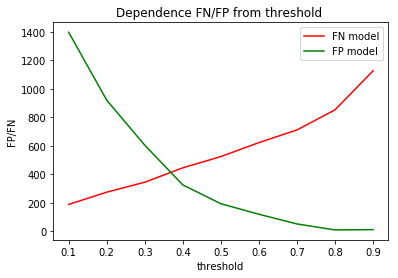

In [62]:
import matplotlib.pyplot as plt 
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fn_arr, color = "r", label='FN model') 
plt.xlabel('threshold') 
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fp_arr, color = "g", label='FP model') 
plt.xlabel('threshold') 
plt.ylabel('FP/FN') 
plt.legend()
plt.title("Dependence FN/FP from threshold ")
plt.show()

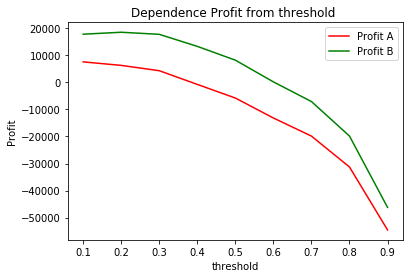

In [63]:
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], profit_a_arr, color = "r", label='Profit A') 
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], profit_b_arr, color = "g", label='Profit B') 
plt.xlabel('threshold') 
plt.ylabel('Profit') 
plt.legend()
plt.title("Dependence Profit from threshold ")
plt.show()

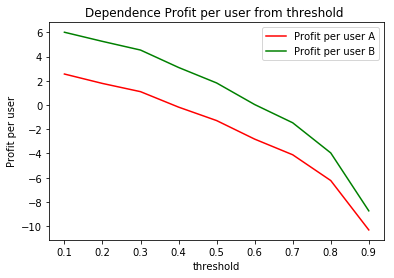

In [64]:
#profit_a_per_user_arr
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], profit_a_per_user_arr, color = "r", label='Profit per user A') 
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], profit_b_per_user_arr, color = "g", label='Profit per user B') 
plt.xlabel('threshold') 
plt.ylabel('Profit per user') 
plt.legend()
plt.title("Dependence Profit per user from threshold ")
plt.show()

# Which you decide to choose? Under what circumstances (how many clients will you lose in both situations; what should be the decision criteria)?

Actually, this depends on the whole company's economic situation. I guess that in a real situation we will not have such a huge acceptance rate. I like the variant when we optimize the model to identify maximum people who will churn (max TP and min FN) (choose Strategy B). So I will choose the model with the lowest FN, but in a real situation it is necessary to find a balance between models with lowest FN and higher FP. The formula for lost clients will be like:  

FN+(TP ***** 0.1)= 357+(1512 * 0.1)=508.2 So we will lose about 508 customers.

# How hard does your profit per customer decrease for customers for whom you provide a discount, compared to customers for whom you do not provide a discount? Compare this number with the discount.

In [66]:
profit_without_discont = tn * p + fp * p - losses
profit_per_user_without_discont = profit_without_discont / collections.Counter(df['Churn'])[0]
print("profit_per_user_without_discont = ", profit_per_user_without_discont)
print("profit_per_user_b = ", profit_per_user_b)
print("p = ",p)
print("30% discount = ",p*0.3)
print("With discount profit per user decreased at = ", round(100 - (profit_per_user_b * 100 / profit_per_user_without_discont),2))

profit_per_user_without_discont =  34.7118206062906
profit_per_user_b =  5.265861816009369
p =  62.85776104583815
30% discount =  18.857328313751445
With discount profit per user decreased at =  84.83


According to my calculation profit per customer decreases at almost 84%. But providing discount still relevant because we still saving some customers and make more profit from them